In [65]:
import tensorflow as tf #modelling
import pandas as pd #reading and processing data
import seaborn as sns #visualization
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber ,MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
import numpy as np

# Data prepration

In [5]:
data = pd.read_csv('train.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [6]:
data.shape

(1000, 12)

In [7]:
# sns.pairplot(data[["years", "km", "rating", "condition", "economy", "top speed", "hp", "torque", "current price"]], diag_kind='kde')

In [8]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data , tf.float32)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, 3.000000e+00,
        7.894500e+04, 1.000000e+00, 2.000000e+00, 1.400000e+01,
        1.770000e+02, 7.300000e+01, 1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, 6.000000e+00,
        1.172200e+05, 5.000000e+00, 9.000000e+00, 9.000000e+00,
        1.480000e+02, 7.400000e+01, 9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, 2.000000e+00,
        1.325380e+05, 2.000000e+00, 8.000000e+00, 1.500000e+01,
        1.810000e+02, 5.300000e+01, 9.700000e+01, 2.153860e+05],
       [4.000000e+00, 5.739990e+05, 7.223810e+05, 4.000000e+00,
        1.010650e+05, 4.000000e+00, 3.000000e+00, 1.100000e+01,
        1.970000e+02, 5.400000e+01, 1.160000e+02, 2.442955e+05],
       [5.000000e+00, 6.913880e+05, 8.113350e+05, 6.000000e+00,
        6.155900e+04, 3.000000e+00, 9.000000e+00, 1.200000e+01,
        1.600000e+02, 5.300000e+01, 1.050000e+02, 5

In [9]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[2.27000e+02, 6.45041e+05, 7.52476e+05, 7.00000e+00, 6.34980e+04,
        1.00000e+00, 1.00000e+01, 1.00000e+01, 1.73000e+02, 1.08000e+02,
        7.20000e+01, 4.86590e+05],
       [3.33000e+02, 5.43506e+05, 8.80724e+05, 5.00000e+00, 1.20404e+05,
        5.00000e+00, 1.00000e+00, 1.50000e+01, 1.69000e+02, 7.10000e+01,
        1.30000e+02, 2.30797e+05],
       [1.41000e+02, 6.66466e+05, 7.65086e+05, 5.00000e+00, 8.46450e+04,
        4.00000e+00, 9.00000e+00, 1.40000e+01, 1.70000e+02, 1.04000e+02,
        9.00000e+01, 4.05950e+05],
       [5.35000e+02, 5.10892e+05, 8.49859e+05, 6.00000e+00, 9.09410e+04,
        1.00000e+00, 7.00000e+00, 1.00000e+01, 1.96000e+02, 8.20000e+01,
        9.30000e+01, 3.21363e+05],
       [4.11000e+02, 5.27890e+05, 7.38409e+05, 3.00000e+00, 1.24079e+05,
        4.00000e+00, 2.00000e+00, 1.50000e+01, 1.37000e+02, 9.40000e+01,
        9.20000e+01, 1.37514e+05]], dtype=float32)>

In [10]:
X = tensor_data[:, 3:-1] #taking all the rows and negelcting the first 3 columns and last column
X.shape

TensorShape([1000, 8])

In [11]:
y = tensor_data[:, -1] #taking last column only
y = tf.expand_dims(y, axis=-1) #expanding it to two dimensions so that the shape of input and output will be same
y.shape

TensorShape([1000, 1])

In [37]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [95]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
X_train.shape

TensorShape([800, 8])

In [96]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [97]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VAL_RATIO + TRAIN_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VAL_RATIO + TRAIN_RATIO))]
X_val.shape

TensorShape([100, 8])

In [98]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [99]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO + VAL_RATIO)):]
X_test.shape

TensorShape([100, 8])

In [100]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

## Normalization
$$
\frac{x-mean}{std\; devaition}
$$

In [101]:
#Scaling our data
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)[:5]


<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.3923067 , -1.2512276 , -1.4196993 ,  1.5405154 , -0.7037307 ,
         0.31803173,  1.1436204 , -1.4842608 ],
       [ 0.22962886,  0.7005956 ,  1.4375572 , -1.6367148 ,  1.5162399 ,
         0.11008266, -0.6634132 ,  1.2620683 ],
       [ 0.22962886, -0.5259051 ,  0.7232431 ,  1.1874897 ,  1.0722457 ,
         0.16206992,  0.94826543, -0.63195175],
       [ 0.8109678 , -0.30995807, -1.4196993 ,  0.48143864, -0.7037307 ,
         1.5137389 , -0.12618701, -0.48990023],
       [-0.933049  ,  0.8266447 ,  0.7232431 , -1.2836893 ,  1.5162399 ,
        -1.5535098 ,  0.45987797, -0.53725076]], dtype=float32)>

In [102]:
#using sequential api
model = tf.keras.Sequential([
    InputLayer(batch_shape=(32,8)),
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
]) # two layers , one is normalization layer, other is output layer

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (32, 8)                │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 128)              │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (32, 128)              │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (32, 128)              │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (32, 1)                │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

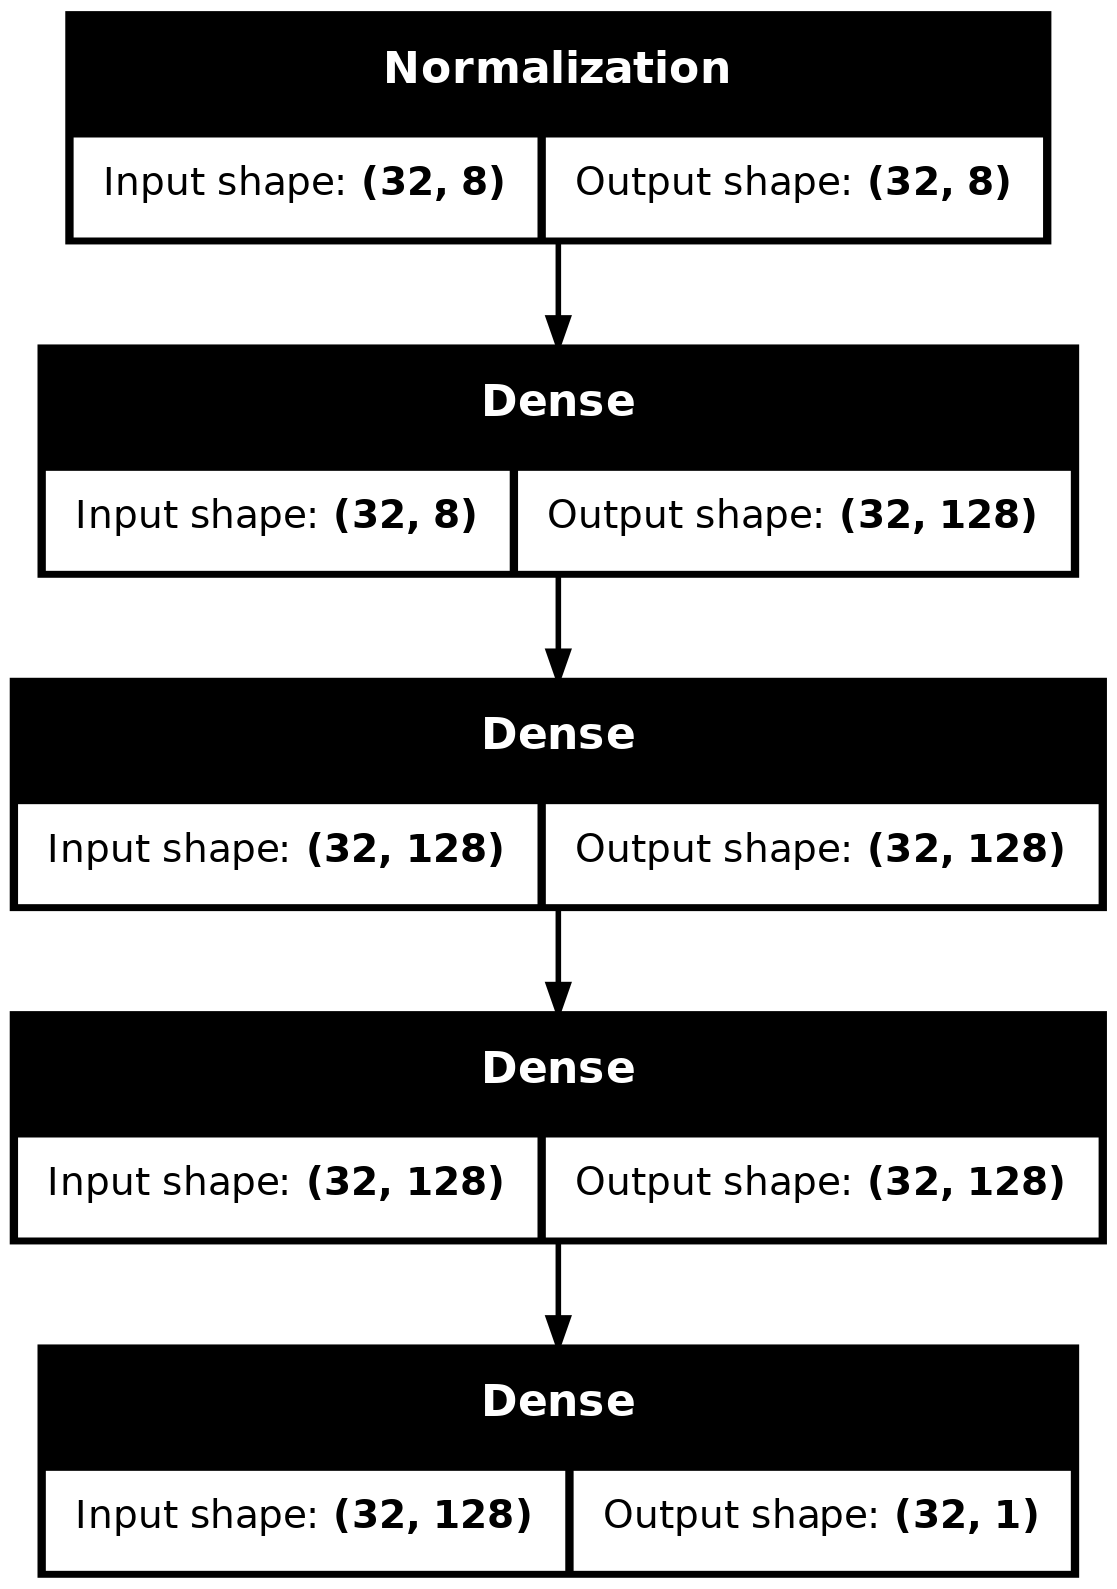

In [103]:
#if this gives error install graphicsvz in your system
#sudo apt-get install graphviz

tf.keras.utils.plot_model(model, to_file= 'model.png', show_shapes=True)

In [104]:
model.compile(
                loss=MeanAbsoluteError(), 
                optimizer=Adam(learning_rate=0.1),
                metrics=[RootMeanSquaredError()]
            )

In [105]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)

Epoch 1/100


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 237235.3438 - root_mean_squared_error: 274062.8750 - val_loss: 62682.1992 - val_root_mean_squared_error: 77125.0078
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 58813.4570 - root_mean_squared_error: 72607.5781 - val_loss: 51519.5469 - val_root_mean_squared_error: 62483.8555
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 46500.5781 - root_mean_squared_error: 57060.9141 - val_loss: 48917.4219 - val_root_mean_squared_error: 58968.3320
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 42428.9727 - root_mean_squared_error: 53160.2188 - val_loss: 44510.6836 - val_root_mean_squared_error: 53290.3750
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 39412.3906 - root_mean_squared_error: 49896.7109 - val_loss: 45203.4531 - val_root_mean_squared_error: 54267.3789
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 40663.8672 - root_mean_squared_error: 50338.5312 - val_loss: 43011.0859 - val_roo

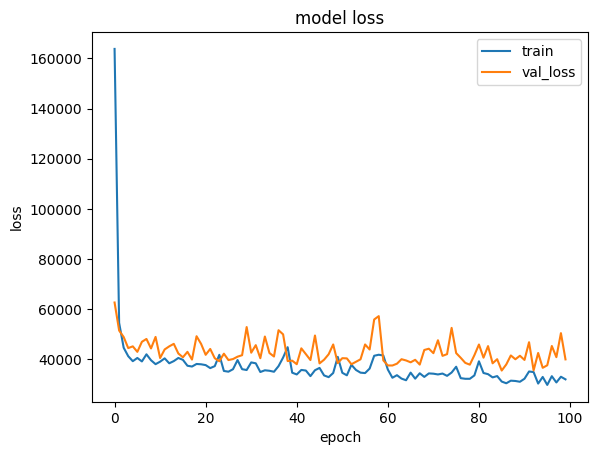

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val_loss'])
plt.show()

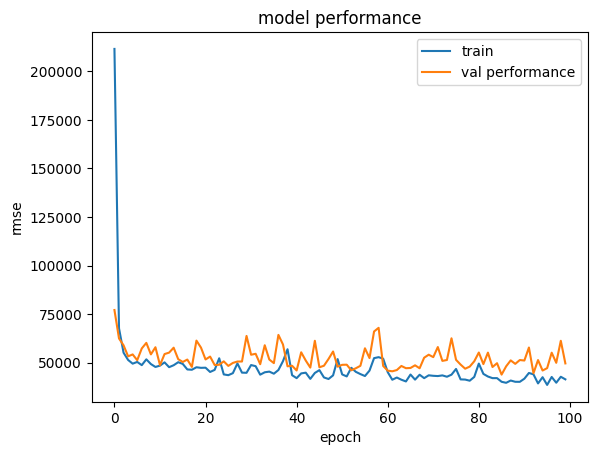

In [107]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend(['train', 'val performance'])
plt.show()

In [108]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 40009.5039 - root_mean_squared_error: 49291.3594


[39481.234375, 48394.26953125]

In [109]:
y_pred = list(model.predict(X_test)[:, 0])
y_true = list(y_test[:, 0])

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/stepWARNING:tensorflow:5 out of the last 29 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7fd86b7ad360> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


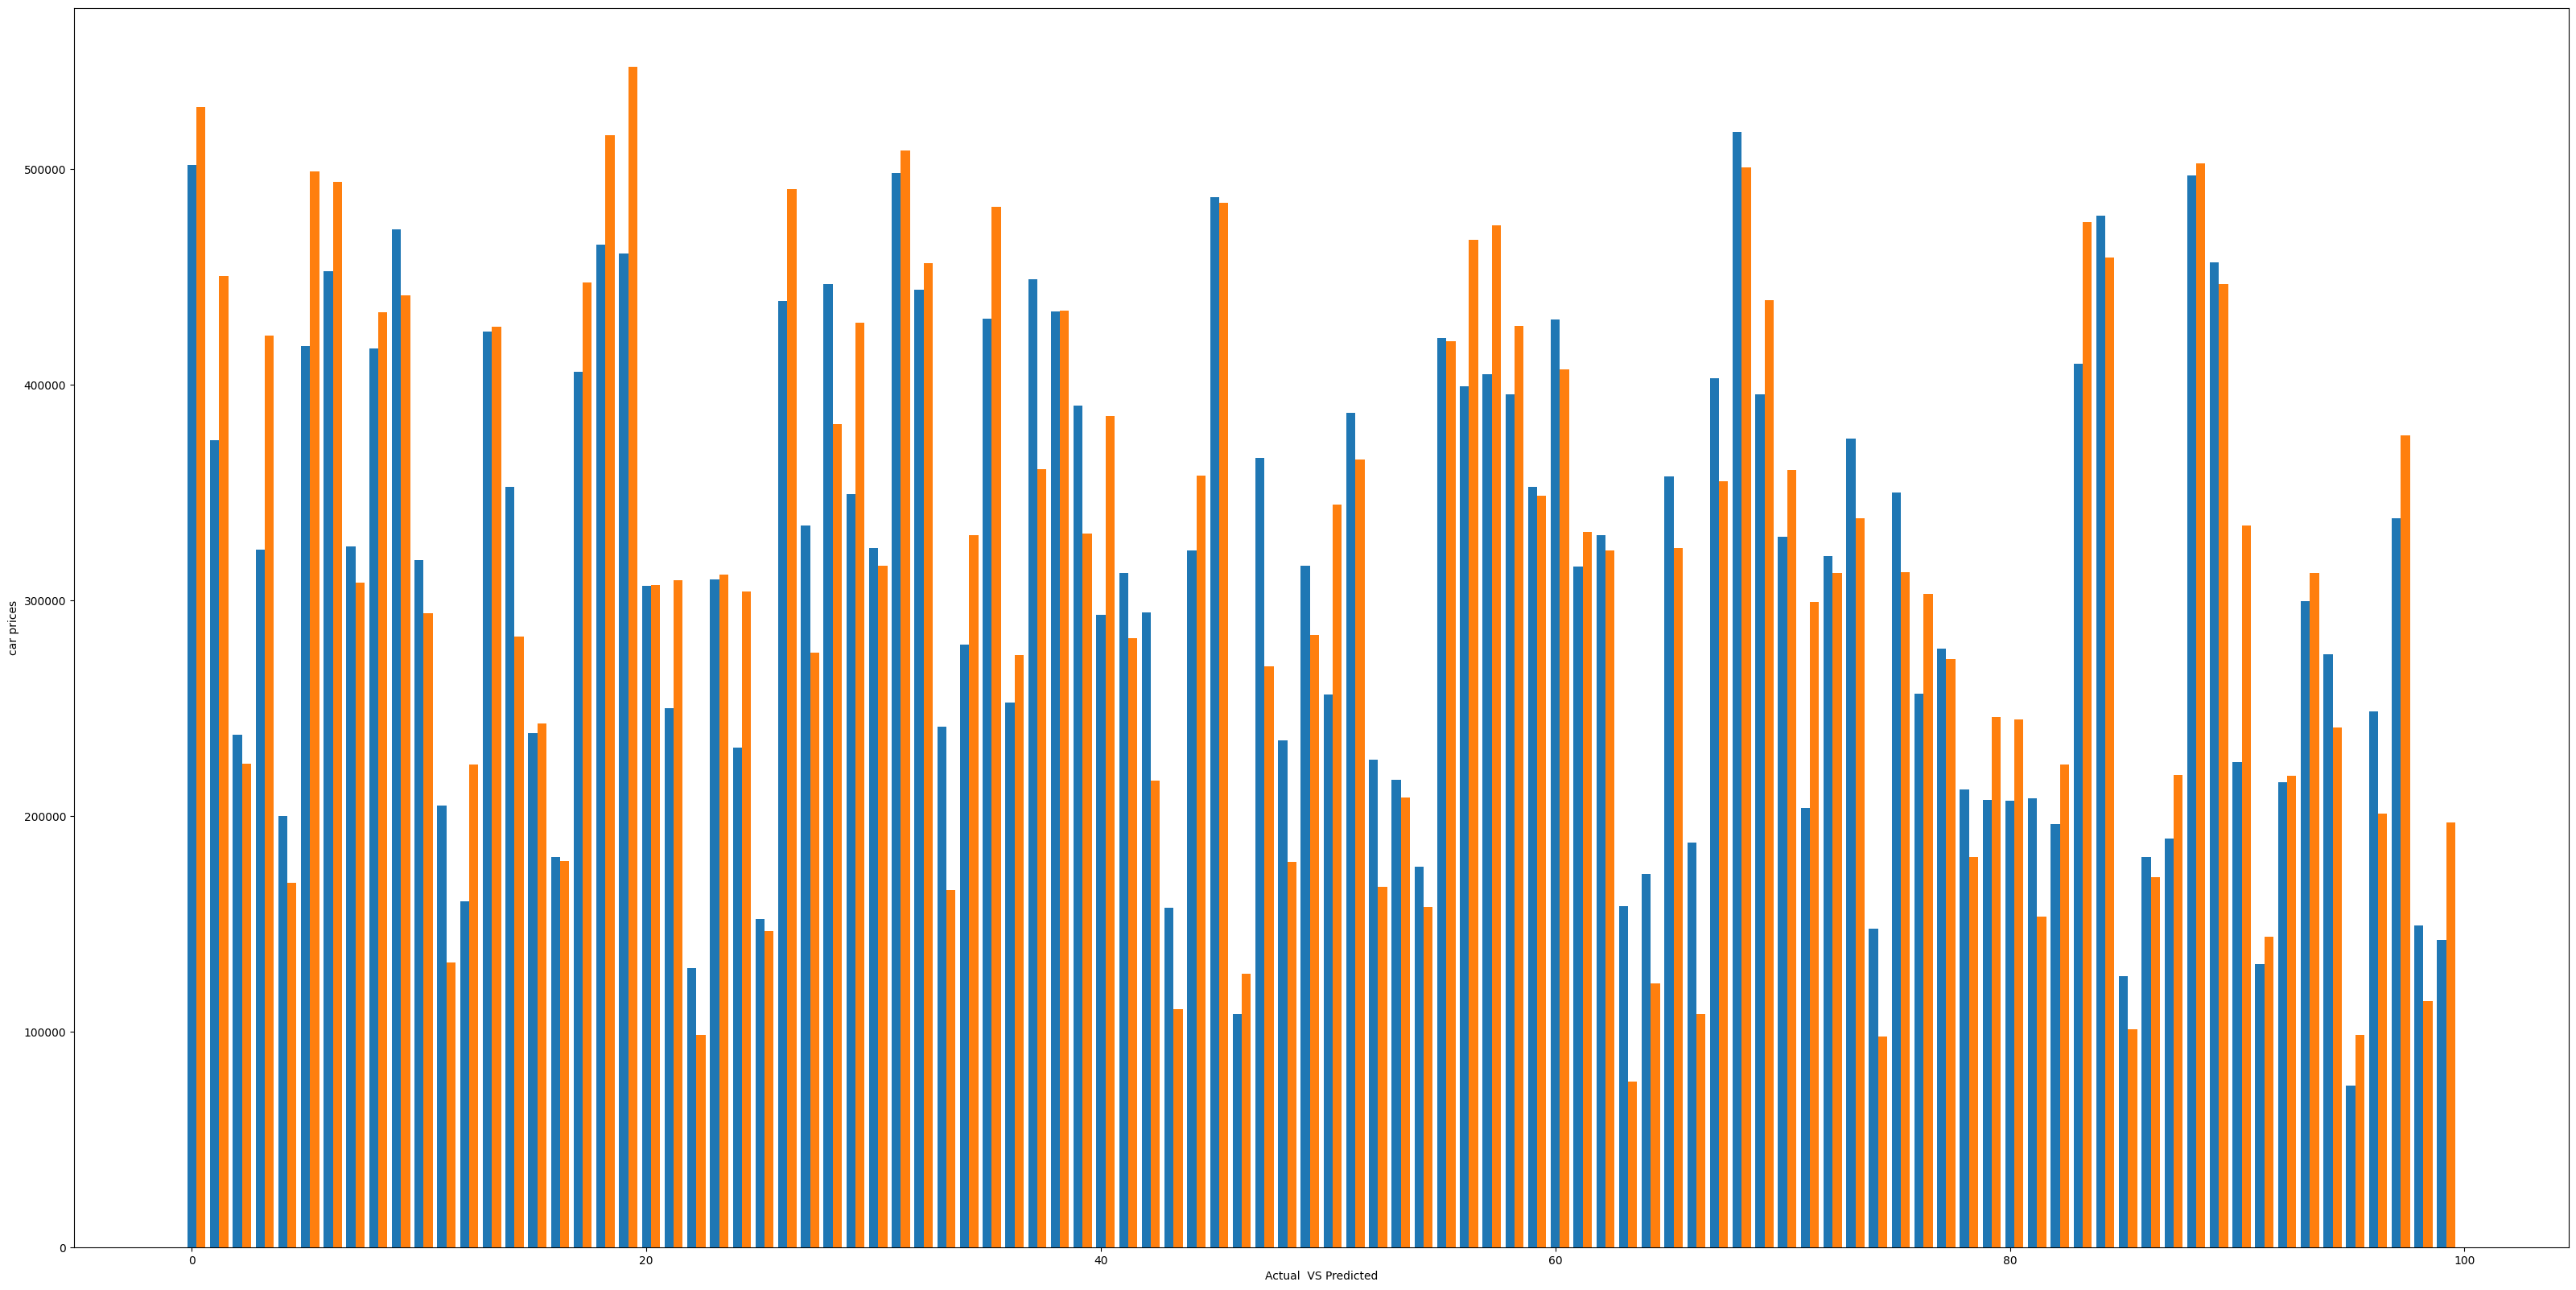

In [110]:
ind = np.arange(100)
plt.figure(figsize=(40,20))
width = 0.4

plt.bar(ind, y_pred, width , label='predicted car price')
plt.bar(ind +width, y_true, width , label='actual car price')

plt.xlabel('Actual  VS Predicted')
plt.ylabel('car prices')

plt.show()